In [1]:
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import KFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

import json

from IPython.display import clear_output

In [2]:
MODEL_FILE = "Random_Forest_All.json"

In [3]:
# Entscheidungsbaum
TREE_PARAMS = {
    "random_state" : 0,
    "max_depth": 7,
    "n_jobs" : -1
}

In [4]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [5]:
# Check if Models exists

In [6]:
model_path = DATASET_DIR / "Models" / MODEL_FILE
MODEL_EXIST = model_path.is_file()

In [7]:
# Daten

In [8]:
app_train_mets = pd.read_csv(DATASET_DIR / "Datenaufbereitung" / "app_train_mets.csv", index_col="SK_ID_CURR")
app_train_cats = pd.read_csv(DATASET_DIR / "Datenaufbereitung" / "app_train_cats.csv", index_col="SK_ID_CURR")
bureau_mets = pd.read_csv(DATASET_DIR / "Datenaufbereitung" / "bureau_mets.csv", index_col="SK_ID_CURR")
bureau_cats = pd.read_csv(DATASET_DIR / "Datenaufbereitung" / "bureau_cats.csv", index_col="SK_ID_CURR")
pa_mets = pd.read_csv(DATASET_DIR / "Datenaufbereitung" / "pa_mets.csv", index_col="SK_ID_CURR")
pa_cats = pd.read_csv(DATASET_DIR / "Datenaufbereitung" / "pa_cats.csv", index_col="SK_ID_CURR")
ip_mets = pd.read_csv(DATASET_DIR / "Datenaufbereitung" / "ip_mets.csv", index_col="SK_ID_CURR")
pos_mets = pd.read_csv(DATASET_DIR / "Datenaufbereitung" / "pos_mets.csv", index_col="SK_ID_CURR")

In [9]:
# join all ACHTUNG das ist die Schnittmenge! Zuvor sollten fehlende Daten aufbereitet werden.

In [10]:
app_train = pd.merge(app_train_mets, app_train_cats, left_index=True, right_index=True)
app_train = pd.merge(app_train, bureau_mets, left_index=True, right_index=True)
app_train = pd.merge(app_train, bureau_cats, left_index=True, right_index=True)
app_train = pd.merge(app_train, pa_mets, left_index=True, right_index=True)
app_train = pd.merge(app_train, pa_cats, left_index=True, right_index=True)
app_train = pd.merge(app_train, ip_mets, left_index=True, right_index=True)
app_train = pd.merge(app_train, pos_mets, left_index=True, right_index=True)

In [11]:
app_train.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,NAME_INCOME_TYPE,CODE_GENDER,NAME_EDUCATION_TYPE,REG_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,ORGANIZATION_TYPE,REGION_RATING_CLIENT,OCCUPATION_TYPE,DAYS_CREDIT_0.0,DAYS_CREDIT_0.25,DAYS_CREDIT_0.5,DAYS_CREDIT_0.75,DAYS_CREDIT_1.0,CREDIT_DAY_OVERDUE_0.0,CREDIT_DAY_OVERDUE_0.25,CREDIT_DAY_OVERDUE_0.5,CREDIT_DAY_OVERDUE_0.75,CREDIT_DAY_OVERDUE_1.0,DAYS_CREDIT_ENDDATE_0.0,DAYS_CREDIT_ENDDATE_0.25,DAYS_CREDIT_ENDDATE_0.5,DAYS_CREDIT_ENDDATE_0.75,DAYS_CREDIT_ENDDATE_1.0,CNT_CREDIT_PROLONG_0.0,CNT_CREDIT_PROLONG_0.25,CNT_CREDIT_PROLONG_0.5,CNT_CREDIT_PROLONG_0.75,CNT_CREDIT_PROLONG_1.0,AMT_CREDIT_SUM_0.0,AMT_CREDIT_SUM_0.25,AMT_CREDIT_SUM_0.5,AMT_CREDIT_SUM_0.75,AMT_CREDIT_SUM_1.0,AMT_CREDIT_SUM_DEBT_0.0,AMT_CREDIT_SUM_DEBT_0.25,AMT_CREDIT_SUM_DEBT_0.5,AMT_CREDIT_SUM_DEBT_0.75,AMT_CREDIT_SUM_DEBT_1.0,AMT_CREDIT_SUM_LIMIT_0.0,AMT_CREDIT_SUM_LIMIT_0.25,AMT_CREDIT_SUM_LIMIT_0.5,AMT_CREDIT_SUM_LIMIT_0.75,AMT_CREDIT_SUM_LIMIT_1.0,AMT_CREDIT_SUM_OVERDUE_0.0,AMT_CREDIT_SUM_OVERDUE_0.25,AMT_CREDIT_SUM_OVERDUE_0.5,AMT_CREDIT_SUM_OVERDUE_0.75,AMT_CREDIT_SUM_OVERDUE_1.0,Closed,Active,AMT_DOWN_PAYMENT_0.0,AMT_DOWN_PAYMENT_0.25,AMT_DOWN_PAYMENT_0.5,AMT_DOWN_PAYMENT_0.75,AMT_DOWN_PAYMENT_1.0,RATE_DOWN_PAYMENT_0.0,RATE_DOWN_PAYMENT_0.25,RATE_DOWN_PAYMENT_0.5,RATE_DOWN_PAYMENT_0.75,RATE_DOWN_PAYMENT_1.0,DAYS_DECISION_0.0,DAYS_DECISION_0.25,DAYS_DECISION_0.5,DAYS_DECISION_0.75,DAYS_DECISION_1.0,SELLERPLACE_AREA_0.0,SELLERPLACE_AREA_0.25,SELLERPLACE_AREA_0.5,SELLERPLACE_AREA_0.75,SELLERPLACE_AREA_1.0,CNT_PAYMENT_0.0,CNT_PAYMENT_0.25,CNT_PAYMENT_0.5,CNT_PAYMENT_0.75,CNT_PAYMENT_1.0,DAYS_FIRST_DRAWING_0.0,DAYS_FIRST_DRAWING_0.25,DAYS_FIRST_DRAWING_0.5,DAYS_FIRST_DRAWING_0.75,DAYS_FIRST_DRAWING_1.0,DAYS_FIRST_DUE_0.0,DAYS_FIRST_DUE_0.25,DAYS_FIRST_DUE_0.5,DAYS_FIRST_DUE_0.75,DAYS_FIRST_DUE_1.0,DAYS_LAST_DUE_1ST_VERSION_0.0,DAYS_LAST_DUE_1ST_VERSION_0.25,DAYS_LAST_DUE_1ST_VERSION_0.5,DAYS_LAST_DUE_1ST_VERSION_0.75,DAYS_LAST_DUE_1ST_VERSION_1.0,AMT_APPLICATION_0.0,AMT_APPLICATION_0.25,AMT_APPLICATION_0.5,AMT_APPLICATION_0.75,AMT_APPLICATION_1.0,DAYS_TERMINATION_0.0,DAYS_TERMINATION_0.25,DAYS_TERMINATION_0.5,DAYS_TERMINATION_0.75,DAYS_TERMINATION_1.0,NAME_CONTRACT_STATUS Refused,CODE_REJECT_REASON HC,NAME_YIELD_GROUP low_normal,NAME_CONTRACT_TYPE Revolving loans,PRODUCT_COMBINATION Card Street,NAME_CLIENT_TYPE New,NAME_YIELD_GROUP high,NAME_PORTFOLIO Cards,PRODUCT_COMBINATION Cash X-Sell: low,NAME_CLIENT_TYPE Refreshed,PRODUCT_COMBINATION POS industry with interest,MIN_TIMEDIFF,MIN_AMTDIFF,MEAN_TIMEDIFF,MEAN_AMTDIFF,MAX_TIMEDIFF,MAX_AMTDIFF,CNT_CREDITS_PAST,CNT_CREDITS_CURR,SUM_PAYCOUNTS_MONTHS,SUM_DPD
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,0,202500.0,406597.5,0.018801,-9461,-637,-3648.0,-2120,0.083037,0.262949,0.139376,0.972200,0.014900,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,-1437.0,-1122.0,-1042.5,-602.75,-103.0,0.0,0.0,0.0,0.0,0.0,-1072.0,-1006.25,-424.5,79.25,780.0,0.0,0.0,0.0,0.0,0.0,0.0,28759.17375,54130.50,124301.25,450000.0,0.0,0.0,0.0,0.0,245781.0,0.0,0.0,0.0,7997.14125,31988.565,0.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-606.0,-606.0,-606.0,-606.0,-606.0,500.0,500.00,500.0,500.00,500.0,24.0,24.0,24.0,24.000000,24.0,365243.0,365243.0,365243.0,365243.0,365243.0,-565.0,-565.0,-565.0,-565.0,-565.0,125.0,125.0,125.0,125.0,125.0,179055.0,179055.00,179055.0,179055.0,179055.0,-17.0,-17.0,-17.0,-17.00,-17.0,0,0,0,0,0,0,0,0,0,0,0,12.0,0.000,20.421053,0.000000,31.0,0.0,0.0,1.0,6.0,0
100003,0,0,2

In [12]:
# Ermittlung Reihenfolge

In [13]:
y = app_train["TARGET"]
x = app_train.drop(["TARGET"], axis=1)

In [14]:
if not MODEL_EXIST:
    # unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

    # logistisches Regressionsmodell
    model = RandomForestClassifier(**TREE_PARAMS)
    model.fit(x_train, y_train)

    auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
    fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    print(auc)

    # Koeffizienten der einzelnen Klassen
    coef_dict = {}
    for coef, feat in zip(model.feature_importances_, x.columns.values):
        coef_dict[feat] = coef

    # Feature Importance
    d = dict(sorted(coef_dict.items(), key=lambda item: item[1], reverse=True))
    order = list(d.keys())
    
    model_data = {
    "todo" : order,
    "keep" : [],
    "drop" : [],
    "params" : LOG_PARAMS,
    "auc" : [],
    "p" : [],
    "n" : []
    }
    
    auc_temp = 0.5

In [15]:
if MODEL_EXIST:
    with open(DATASET_DIR / "Models" / MODEL_FILE, 'r') as file:
        model_data = json.load(file)
    auc_temp = model_data["auc"][-1]

In [16]:
#Random Forest Parameterbestimmung

In [17]:
df = app_train

for index, h in enumerate(model_data["todo"]):
    
    model_data["keep"].append(head)
    
    X = df[model_data["keep"] + ["TARGET"]]
    y = X["TARGET"]
    x = X.drop(["TARGET"], axis=1)
    
    model = RandomForestClassifier(**TREE_PARAMS).fit(x, y)
    
    aucs = []

    kfold = KFold(5, shuffle=True, random_state=1)

    # enumerate splits
    for i, (train, test) in enumerate(kfold.split(x)):

        model.fit(x.iloc[train], y.iloc[train])
        auc = roc_auc_score(y.iloc[test], model.predict_proba(x.iloc[test])[:,1])
        aucs.append(auc)
    
    auc = np.mean(aucs)
    n = len(X)
    p = len(X.columns)
    
    if auc > auc_temp:
        
        data["auc"].append(auc)
        data["p"].append(p)
        data["n"].append(n)
        
        auc_temp = auc
        
    else:
        model_data["keep"].remove(head)
        model_data["drop"].append(head)
    
    model_data["todo"].remove(head)
    
    with open(DATASET_DIR / "Models" / MODEL_FILE, 'w') as file:
        json.dump(model_data, file)
        
    clear_output(wait=True)
    print(auc, index+1, len(model_data["todo"]), len(model_data["keep"]), len(model_data["drop"]))

         auc   p       n
54  0.753357  56  247032


<AxesSubplot:>

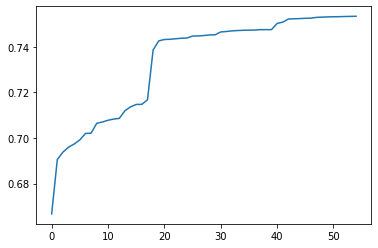

In [18]:
data = {
    "auc" : model_data["auc"],
    "p" : model_data["p"],
    "n" : model_data["n"]
}

result = pd.DataFrame(data)

print(result[result["auc"] == result["auc"].max()])
result["auc"].plot()

In [19]:
model = RandomForestClassifier(**model_data["params"])

aucs = []

kfold = KFold(5, shuffle=True, random_state=1)

X = df[model_data["keep"] + ["TARGET"]]
y = X["TARGET"]
x = X.drop(["TARGET"], axis=1)

# enumerate splits
for i, (train, test) in enumerate(kfold.split(x)):
    
    model.fit(x.iloc[train], y.iloc[train])
    auc = roc_auc_score(y.iloc[test], model.predict_proba(x.iloc[test])[:,1])
    aucs.append(auc)
    
    print('train: %s, test: %s, auc: %s' % (train, test, round(auc,4)))

print("\n")
print("Durchschnitt: %.2f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

train: [     0      1      2 ... 247029 247030 247031], test: [     3     13     14 ... 247014 247017 247019], auc: 0.7494
train: [     0      2      3 ... 247029 247030 247031], test: [     1      4      6 ... 247020 247027 247028], auc: 0.7509
train: [     0      1      2 ... 247028 247029 247030], test: [     8     10     12 ... 247016 247026 247031], auc: 0.7629


KeyboardInterrupt: 